## Setup

In [1]:
!pip install scipy==1.6.1

### Import the necessary packages

In [2]:
import scipy
scipy.__version__

'1.6.1'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [4]:
data=pd.read_csv("abtest.csv")
# copy data to another variable to avoid changing original
enews=data.copy()

### View the first and last 5 rows of the dataset

In [5]:
enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,yes,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
enews.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


### Get the shape of the dataset

In [7]:
enews.shape

(100, 6)

* This dataset has 100 rows and 6 columns.

### Check the data types of the columns

In [8]:
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Change the data types
* group and landing page are redundant, they give us the same information. If a user is in the control group then they have the old landing page and if they're part of the treatment group then they have the new landing page. Because of this I'm deleting the group column altogether since it doesn't give us any new information
* landing_page, converted and language preferred are of object type, therefore we can change them to categories to save some space
* user_id represents the user identification, because of this, numerical operations shouldn't be applied to it so it will be transformed into a string type
* user_id and time_spent_on_the_page are fine as is

In [9]:
enews["user_id"]=enews["user_id"].astype("string")
enews["landing_page"]=enews["landing_page"].astype("category")
enews["converted"]=enews["converted"].astype("category")
enews["language_preferred"]=enews["language_preferred"].astype("category")
enews = enews.drop(columns='group')

In [10]:
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    string  
 1   landing_page            100 non-null    category
 2   time_spent_on_the_page  100 non-null    float64 
 3   converted               100 non-null    category
 4   language_preferred      100 non-null    category
dtypes: category(3), float64(1), string(1)
memory usage: 2.3 KB


### Get a statistical summary of the dataset

In [11]:
enews.describe()

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


* Mean of time_spent_on_page is approximately equal to the median

In [12]:
enews.describe(include=["category"])

,landing_page,converted,language_preferred
count,100,100,100
unique,2,2,3
top,old,yes,Spanish
freq,50,55,34


* Group and landing_page are seperated 50/50 between the treatment/control groups and the old/new landing page respectively
* More users get converted(55) than not(45)
* The top language_preferred is Spanish(34)

### Check for missing values

In [13]:
enews.isnull().sum()

user_id                   0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* This dataset is not missing any values

## Exploratory Data Analysis

### Perform Univariate Analysis

In [14]:
# For numerical variables, I will create a boxplot and histogram to study their central
# tendency and dispersion. That is the purpose of the function below.
def num_obs(feature, name):
    """ Boxplot and histogram plot for numerical variables
    feature: 1-d feature array
    name: name of feature for title in str form
    """    
    fig, (ax1, ax2) = plt.subplots(2, figsize=(15,10))
    fig.suptitle('Observations on ' + name, fontsize=25)
    sns.distplot(feature, ax=ax1) # histogram
    ax1.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax1.axvline(np.median(feature), color='red', linestyle='-') # Add median to the histogram
    sns.boxplot(feature, ax=ax2, showmeans=True, palette='winter') # boxplot

# For categorical variables, I will create a barplot to study the distribution, that is the 
# purpose of the function below
def cat_obs(feature, name):
    """ Bar plot
    feature: 1-d feature array
    name: name of feature for title in str form
    """
    plt.figure(figsize=(15,10))
    ax = sns.countplot(feature, palette='winter') # bar plot
    plt.title('Observations on '+ name, fontsize=25)
    plt.xlabel(name)
    plt.ylabel('Count')

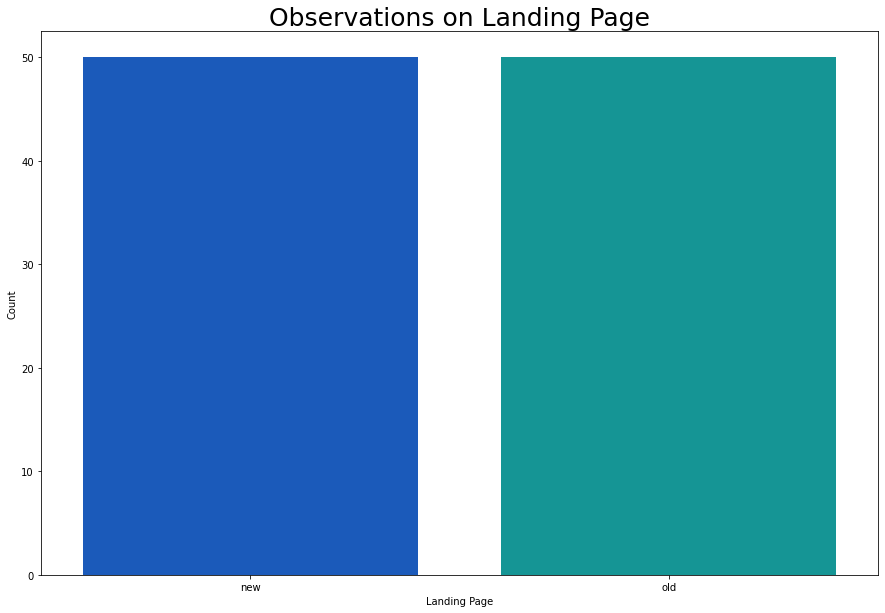

In [15]:
cat_obs(enews.landing_page, 'Landing Page')

* As we already know, the data is split in half by old landing page (control group) and new landing page (treatment group).

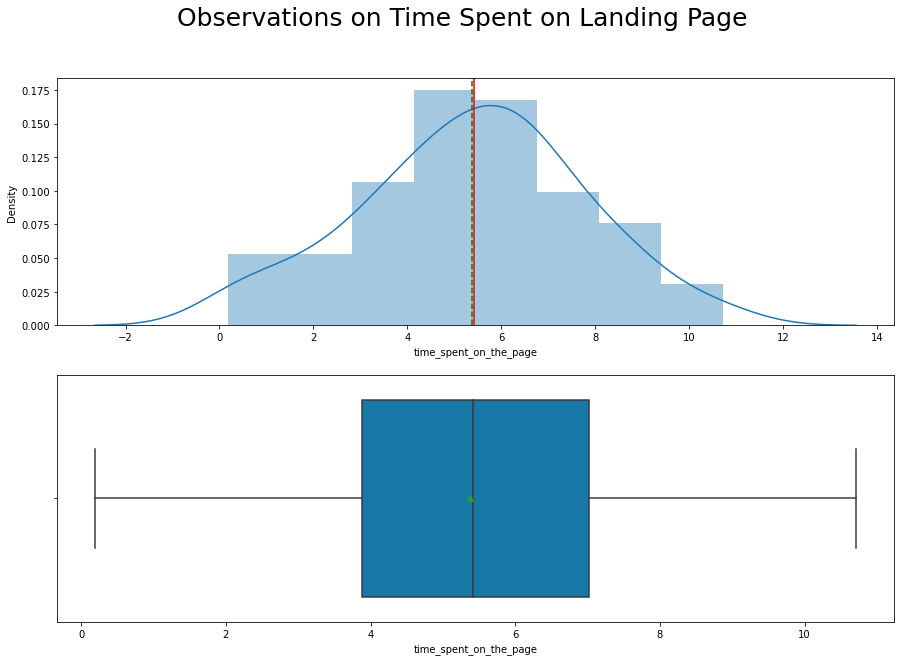

In [16]:
num_obs(enews.time_spent_on_the_page, "Time Spent on Landing Page")

* The time_spent_on_the_page appears to be pretty normally distributed, the mean is slightly lower than the median, but not by a lot at all
* The average time users spend on the page is about 5.4 minutes

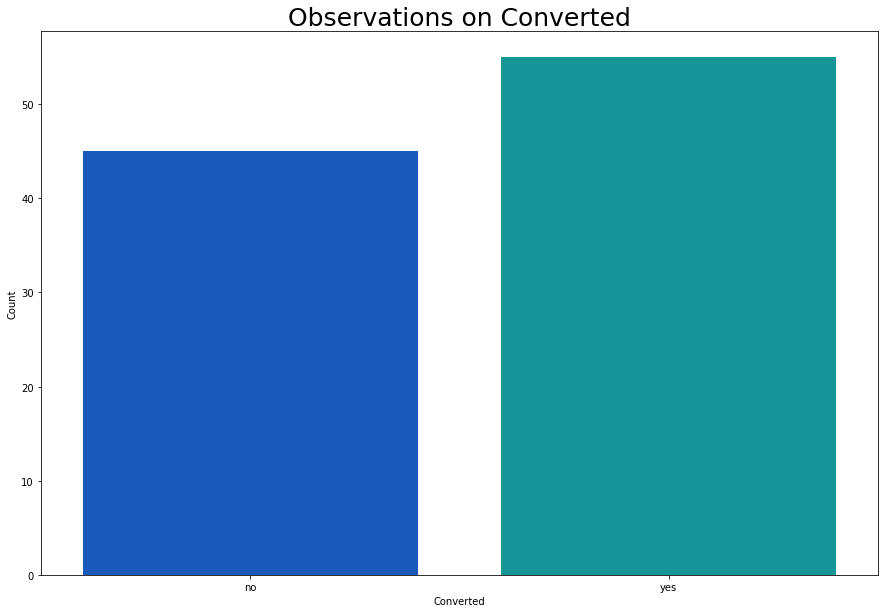

In [17]:
cat_obs(enews.converted, 'Converted')

* As we saw before, there's a higher number of users who are converted (55) than those who are not converted (45).

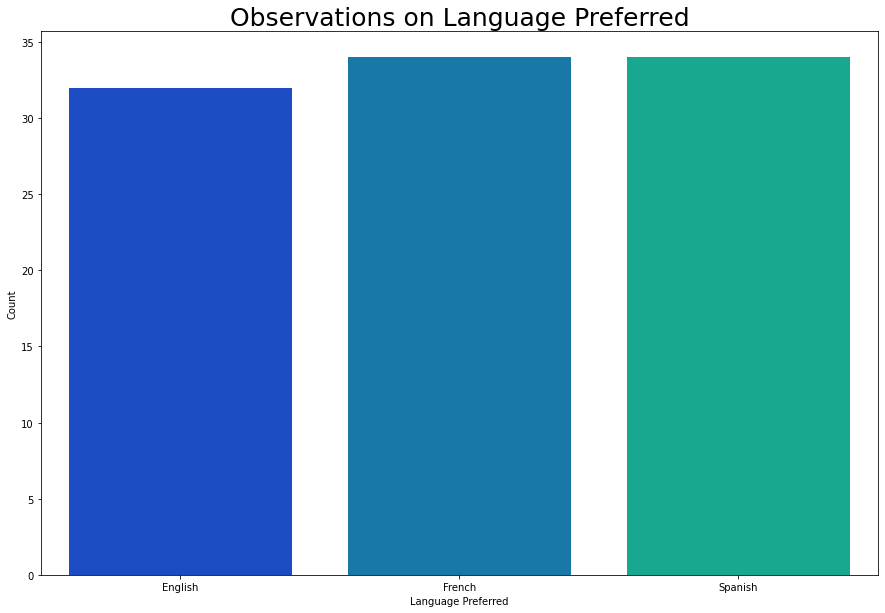

In [18]:
cat_obs(enews.language_preferred, 'Language Preferred')

* It appears that Spanish and French are both more preferred than English and are tied for the top spot in this category.

### Perform Bivariate & Multivariate Analysis

#### Create a Heatmap

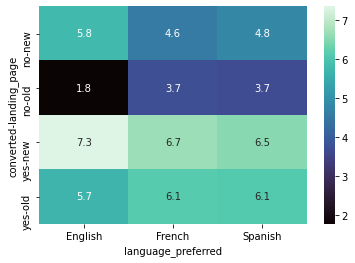

In [19]:
enews_heatmap = enews.pivot_table(values='time_spent_on_the_page',index=['converted', 'landing_page'],columns='language_preferred')
sns.heatmap(enews_heatmap,annot=True, cmap='mako')
plt.show()

* Users who convert typically spend a longer time on the page than those who don't
* Users with English as the preferred language have both the min and max number of time spent on the page, they have the highest range despite being the least popular language
* Users seem to spend more time on the new landing page than on the old landing page

#### Landing page vs time spent on page

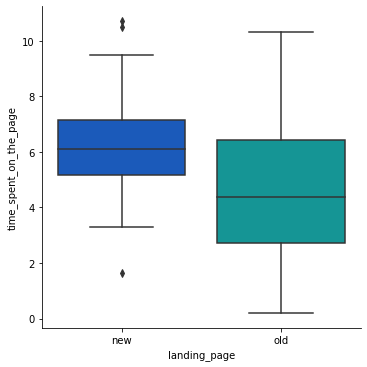

In [20]:
sns.catplot(x="landing_page", y="time_spent_on_the_page", kind="box", data=enews, palette='winter');

* It appears that geneally speaking, users with the new landing page typically spend more time on the page than those with the old landing page

#### Landing page vs converted

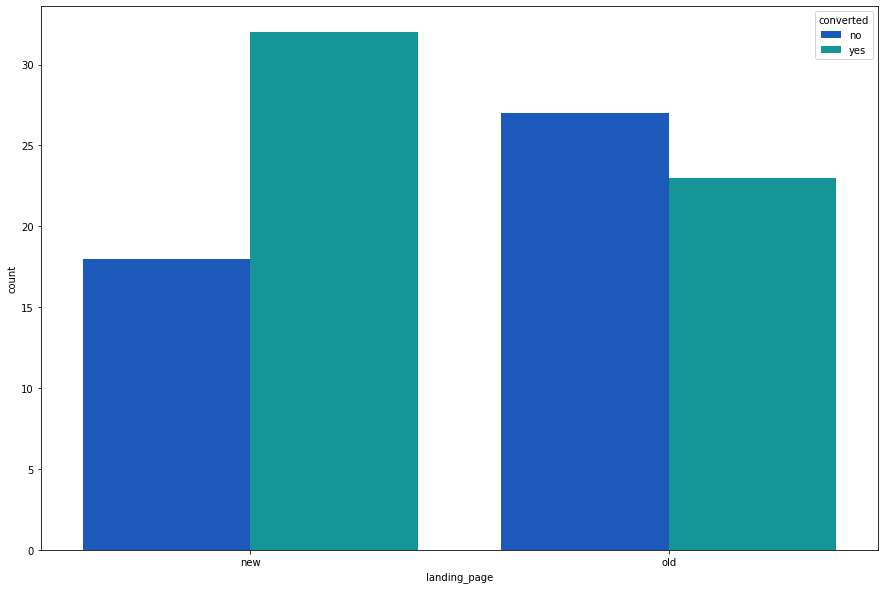

In [21]:
plt.figure(figsize=(15,10))
ax = sns.countplot(enews.landing_page, hue=enews.converted, palette='winter')

* The new landing page has a higher percentage of users who converted, where as the old landing page shows the opposite
* This seems to imply that the new landing page is promising

#### Landing page vs language preferred

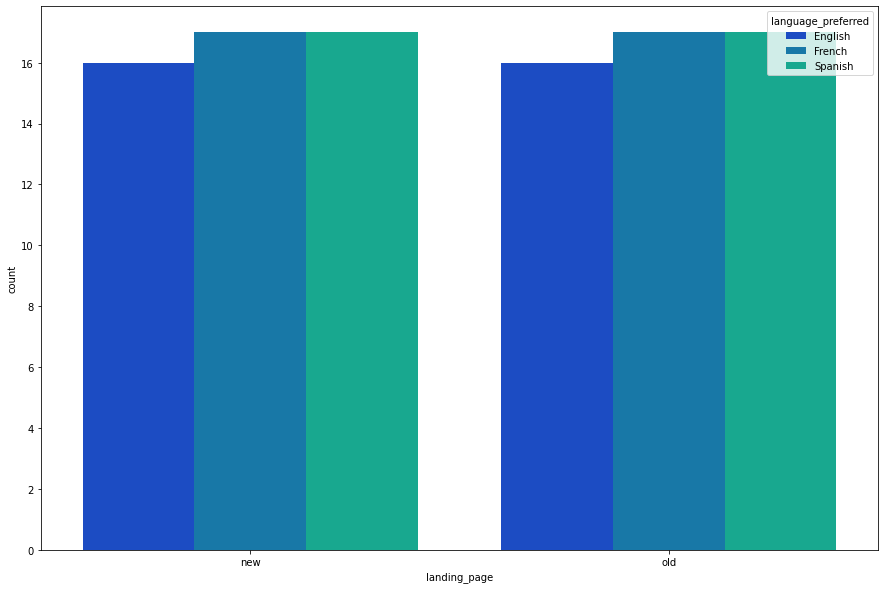

In [22]:
plt.figure(figsize=(15,10))
ax = sns.countplot(enews.landing_page, hue=enews.language_preferred, palette='winter')

* The user's preferred languages seem to be equally distributed between the new and the old landing pages
* In both scenarios, Enlgish is the least popular

#### Converted vs time spent on page

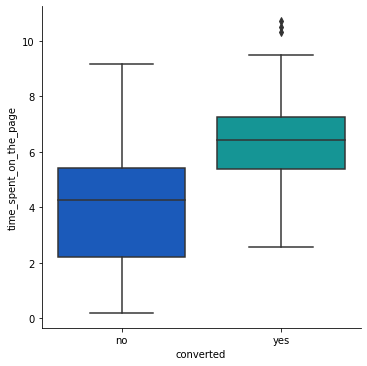

In [23]:
sns.catplot(x="converted", y="time_spent_on_the_page", kind="box", data=enews, palette='winter');

* It appears that if a user spends more time on a page, generally that means they are more likely to be converted

#### Time spent on page vs language preferred

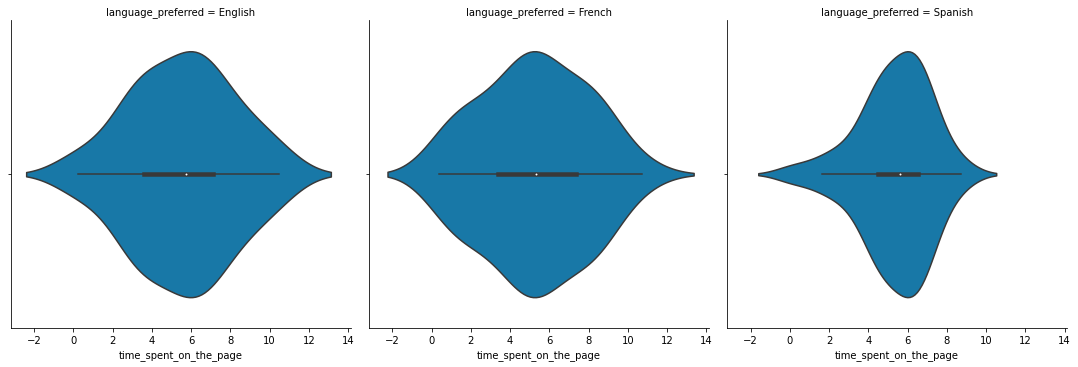

In [24]:
# Dispersion of fitness rank in every product
sns.catplot(x='time_spent_on_the_page',
             col='language_preferred', 
             data=enews,
             col_wrap=4,
             kind="violin", palette='winter');

* Users with Enligh or French as their preferred language seem to have a similar distribution of the amount of time they spend on the page while the users who prefer Spanish are more concentrated around the 6 minute mark

#### Converted vs language preferred

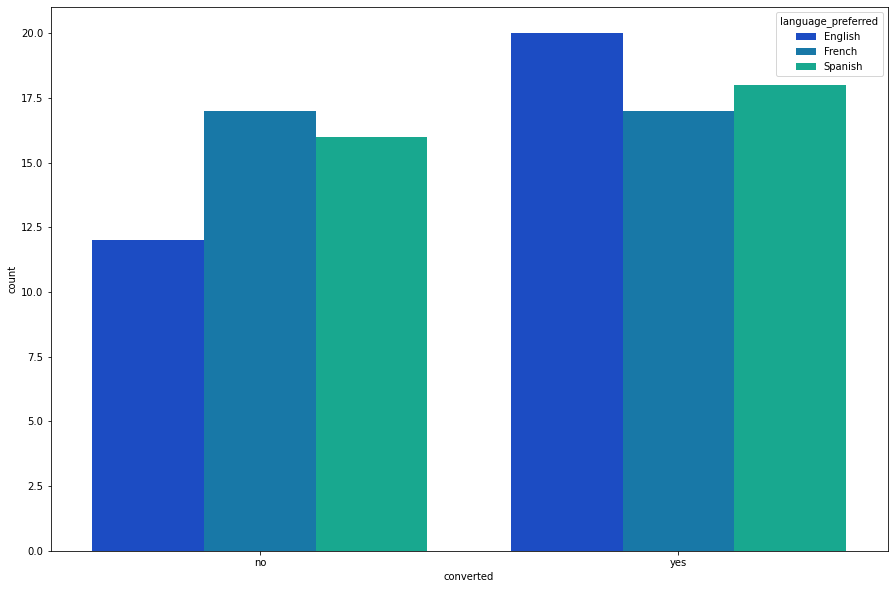

In [25]:
plt.figure(figsize=(15,10))
ax = sns.countplot(enews.converted, hue=enews.language_preferred, palette='winter')

* Both English and Spanish have more conversions than not, French is the only language with a higher percentage that is not converted
* English has the highest conversion count while French has the highest non-conversion count

#### Time spent on page vs converted vs language preferred

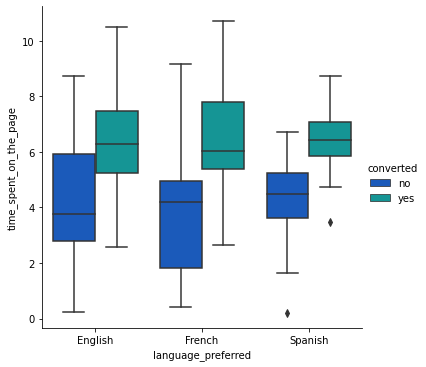

In [26]:
sns.catplot(x="language_preferred", y="time_spent_on_the_page", hue="converted", kind="box", data=enews, palette='winter');

* This shows that more time spent on the page is related to the conversion regardless of preferred language

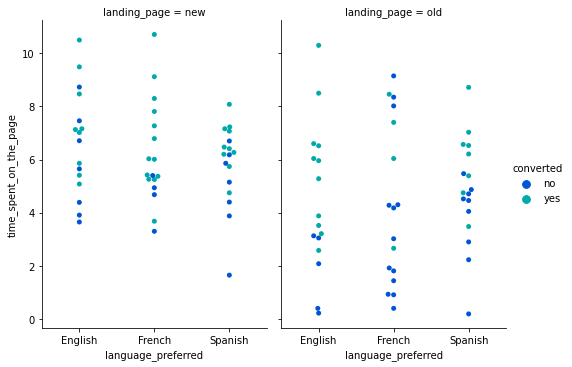

In [27]:
sns.catplot(x="language_preferred", y="time_spent_on_the_page", hue="converted",
            col="landing_page", aspect=.7,
            kind="swarm", data=enews, palette='winter');

* This once again shows that more people spend more time on the new page than the old and therefore more people are converted on the new page

### Hypothesis testing


#### Do the users spend more time on the new landing page than the old landing page?

* $H_0$: mean time spent on new landing page is equal to mean time spent on old landing page
* $H_a$: mean time spent on new landing page is greater than time spent on old landing page
* $\alpha$: significance level of 0.05


#### Paired Sample T-test

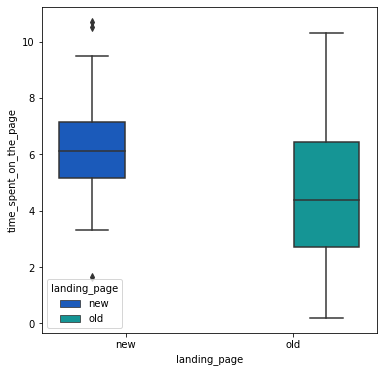

In [28]:
# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "landing_page", y = 'time_spent_on_the_page' , data = enews, hue = 'landing_page', palette='winter')
plt.show()

In [29]:
# seperate data into the two sets, old landing page and new landing page
enews_old = enews.loc[enews['landing_page'] == 'old']
enews_new = enews.loc[enews['landing_page'] == 'new']

In [30]:
#import the required functions
from scipy.stats import ttest_rel

# find the p-value
test_stat, p_value = ttest_rel(enews_old['time_spent_on_the_page'], enews_new['time_spent_on_the_page'], alternative = 'less')
print('The p-value is ', p_value)

The p-value is  0.00029910900937037973


* Since the p value in this scenario is less than $\alpha$ (0.05), we can say that we reject the Null Hypothesis
* Because of this, there is enough statistical significance to conclude that the mean time spent on the new landing page is greater than the mean of the time spent on the old landing page

#### Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

* $H_0$: conversion rate of the new landing page is equal to conversion rate of the old landing page
* $H_a$: conversion rate of the new landing page is greater than the conversion rate of the old landing page
* $\alpha$: significance level of 0.05

#### Two Proportion Z-test

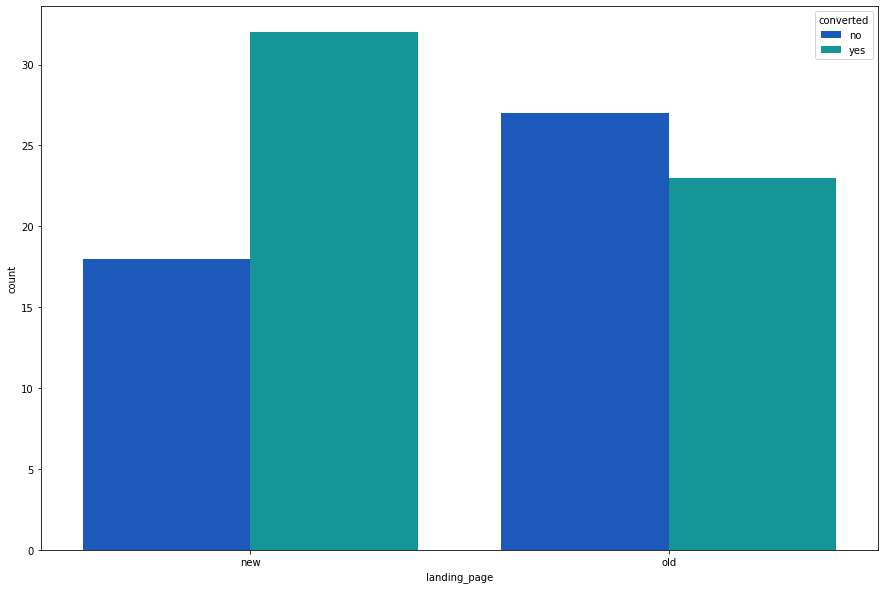

In [31]:
# draw the bar graph for visualization 
plt.figure(figsize=(15,10))
ax = sns.countplot(enews.landing_page, hue=enews.converted, palette='winter')

In [32]:
# get the amount of users who converted per dataset (old vs new landing page)
old_conv = enews_old.loc[enews['converted'] == 'yes']
new_conv = enews_new.loc[enews['converted'] == 'yes']

In [33]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted items
conversion_count = np.array([len(old_conv), len(new_conv)])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conversion_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.07044042927208799


* Since the p value in this scenario is greater than $\alpha$ (0.05), we can say that we fail to reject the Null Hypothesis
* There is not enough statistical evidence to conclude that the conversion rate of the new landing page is not equal to the rate of the old landing page

#### Does the converted status depend on the preferred language?

* $H_0$: Converted status is independent of preferred language
* $H_a$: Converted status is depends on preferred language
* $\alpha$: significance level of 0.05

#### Chi-Square Test for Independence

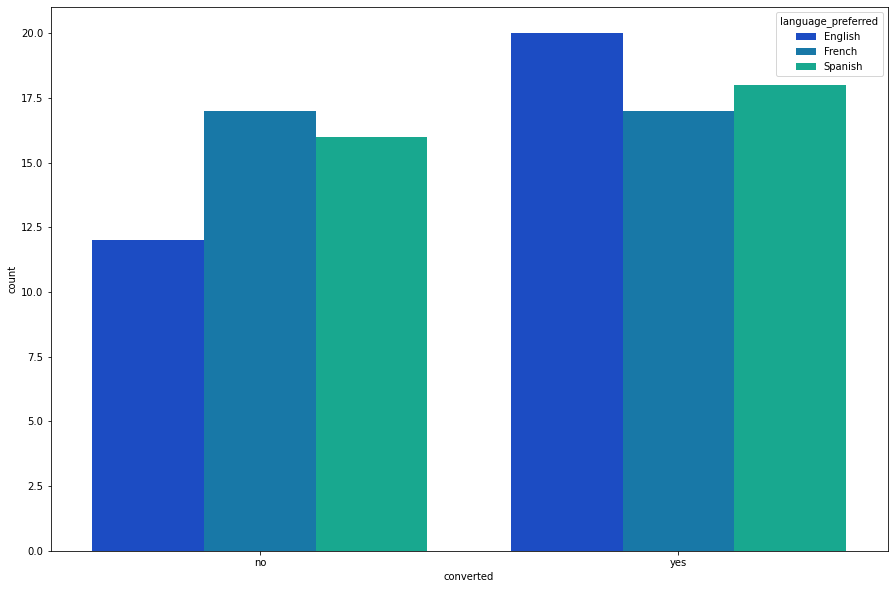

In [34]:
# draw the bar graph for visualization 

plt.figure(figsize=(15,10))
ax = sns.countplot(enews.converted, hue=enews.language_preferred, palette='winter')

In [35]:
# create a contingency table of language and conversion
conv_lang = pd.crosstab(enews['language_preferred'], enews['converted'])
conv_lang

converted,no,yes
language_preferred,,
English,12,20
French,17,17
Spanish,16,18


In [36]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(conv_lang)
print('The p-value is', p_value)

The p-value is 0.5686624745121615


* Since the p value in this scenario is greater than $\alpha$ (0.05), we can say that we fail to reject the Null Hypothesis
* There is not enough statistical evidence to conclude that the converted status is not independent of the preferred language

#### Is the mean time spent on the new page same for the different language users?

* $H_0$: Mean time spent on the new page is equal for every language
* $H_a$: At least one mean time spent on the new page is different
* $\alpha$: significance level of 0.05

#### One-way Anova Test

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


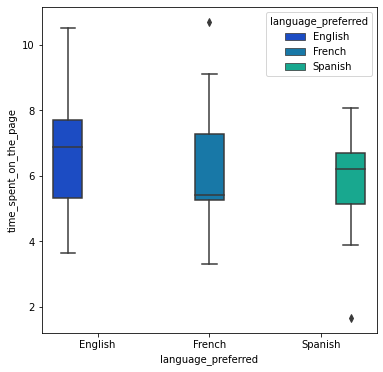

In [37]:
# mean of time spent on new page at different languages
print(enews_new.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = enews_new, hue = 'language_preferred', palette='winter')
plt.show()

In [38]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(enews_new.loc[enews_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              enews_new.loc[enews_new['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              enews_new.loc[enews_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


* Since the p value in this scenario is greater than $\alpha$ (0.05), we can say that we fail to reject the Null Hypothesis
* There is not enough statistical evidence to conclude that the mean time spent on the new page is not equal for different language users

### Conclusions and Recommendations

#### Conclusion

* There is enough statistical evidence to conclude that users spend more time on the new landing page then the old landing page, there's not enough evidence to conclude that the new landing page has a higher conversion rate than the old landing page.
* In addition to this, there is not enough statistical evidence to conclude that the conversion status and preferred langauge are dependent or that the preferred langauge has anything to do with the mean time spent on the new page.


#### Recommendation to business

* The company should put efforts into improving the new landing page, the data shows people are willing to spend more time on this page, but it needs to be improved upon in order to increase the conversion rate.
* The preferred language doesn’t matter when it comes to time spent on the page or the conversion rate, therefore this variable can be given minimum priority whenever making decisions regarding the landing page.
* The new landing page is not currently more effective than the old one, therefore there’s no need to fully implement it until it is improved further.
